In [26]:
# 9회 지역별 부동산 가격

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# 문제01
from sklearn.ensemble import AdaBoostClassifier

In [29]:
# 문제02
loan_df = pd.read_csv('data/9_loan_approval.csv')
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   employment_type      1740 non-null   object 
 1   annual_income        1744 non-null   float64
 2   credit_score         1738 non-null   float64
 3   loan_purpose         1743 non-null   object 
 4   loan_amount          1758 non-null   float64
 5   dti                  1753 non-null   float64
 6   years_employed       1745 non-null   float64
 7   home_ownership       1728 non-null   object 
 8   delinquency_history  1737 non-null   object 
 9   loan_status          1800 non-null   int64  
dtypes: float64(5), int64(1), object(4)
memory usage: 140.8+ KB


<Axes: xlabel='loan_status', ylabel='credit_score'>

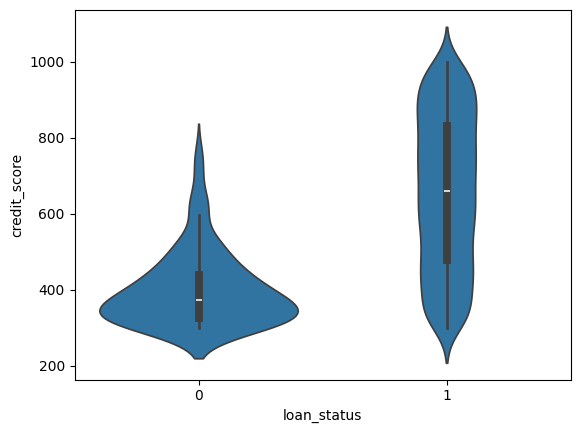

In [30]:
# 문제03
sns.violinplot(data=loan_df, x='loan_status', y='credit_score')

In [31]:
# 문제04
cross_table_ratio = pd.crosstab(loan_df['home_ownership'], loan_df['loan_status'], normalize='index')
cross_table_ratio

loan_status,0,1
home_ownership,,
월세,0.065744,0.934256
자가,0.041528,0.958472
전세,0.034672,0.965328


In [32]:
# 문제05
loan_df.groupby('employment_type')[['annual_income','loan_amount']].mean()

,annual_income,loan_amount
employment_type,,
계약직,10451.086207,5082.815864
무직,11330.117647,5047.351190
자영업,10750.673529,5089.622478
정규직,11139.076087,5127.108173


In [33]:
# 문제06
loan_pre = loan_df.copy()
float_null_col = ['annual_income','credit_score','loan_amount','dti','years_employed']
bum_null_col = ['employment_type','loan_purpose','home_ownership']

for col1 in float_null_col:
    median1 = loan_pre[col1].median()
    loan_pre[col1].fillna(median1, inplace=True)

for col2 in bum_null_col:
    mode1 = loan_pre[col2].mode()[0]
    loan_pre[col2].fillna(mode1, inplace=True)

loan_pre.isnull().sum()

employment_type         0
annual_income           0
credit_score            0
loan_purpose            0
loan_amount             0
dti                     0
years_employed          0
home_ownership          0
delinquency_history    63
loan_status             0
dtype: int64

In [34]:
# 문제07
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
loan_pre['home_ownership'] = le.fit_transform(loan_pre['home_ownership'])
loan_pre['delinquency_history'] = le.fit_transform(loan_pre['delinquency_history'])

loan_pre = pd.get_dummies(loan_pre, columns=['employment_type','loan_purpose'])

In [35]:
loan_pre

,annual_income,credit_score,loan_amount,dti,years_employed,home_ownership,delinquency_history,loan_status,employment_type_계약직,employment_type_무직,employment_type_자영업,employment_type_정규직,loan_purpose_기타,loan_purpose_사업,loan_purpose_생활비,loan_purpose_주택
0,17718.0,603.0,864.0,31.0,15.0,1,0,1,False,True,False,False,False,False,False,True
1,19466.0,875.0,9285.0,320.0,18.0,0,0,1,False,False,False,True,True,False,False,False
2,3919.0,326.0,3907.0,199.0,21.0,1,0,1,False,False,False,True,False,False,True,False
3,18853.0,543.0,6009.0,158.0,18.0,1,0,1,True,False,False,False,False,True,False,False
4,13717.0,916.0,4588.0,424.0,7.0,0,0,1,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,17095.0,661.0,9246.0,187.0,1.0,0,1,1,False,False,True,False,True,False,False,False
1796,7747.0,761.0,5595.0,365.0,20.0,0,0,1,False,False,False,True,False,False,False,True
1797,4631.0,926.0,638.0,187.0,18.0,1,0,1,True,False,False,False,True,False,False,False
1798,8270.0,719.0,6644.0,252.0,6.0,0,1,1,False,False,True,False,False,False,False,True


In [38]:
# 문제08
from sklearn.model_selection import train_test_split

X = loan_pre.drop(['loan_status'], axis=1)
y = loan_pre['loan_status']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=2024, stratify=y)

print(X_train.shape, X_valid.shape)

(1260, 15) (540, 15)


In [39]:
# 문제09
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [41]:
# 문제10
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(random_state=2024)
model_lr.fit(X_train_scaled, y_train)

LogisticRegression(random_state=2024)

In [42]:
# 문제11
from sklearn.ensemble import AdaBoostClassifier
model_ada = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=2024)
model_ada.fit(X_train_scaled, y_train)

AdaBoostClassifier(random_state=2024)

In [44]:
# 문제12
from sklearn.metrics import f1_score, confusion_matrix
pred_ada = model_ada.predict(X_valid_scaled)
ada_f1 = f1_score(pred_ada, y_valid)
print(ada_f1)

0.9912875121006776


<Axes: >

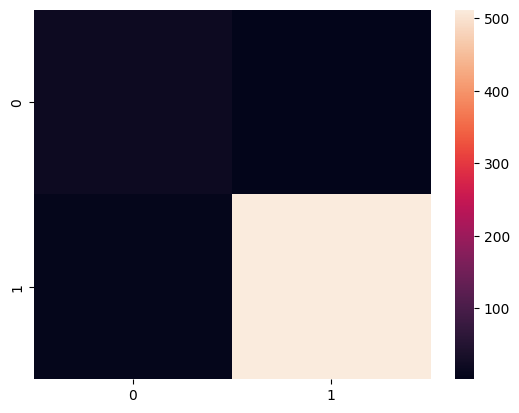

In [45]:
ada_conf = confusion_matrix(pred_ada, y_valid)
sns.heatmap(ada_conf)

In [46]:
# 문제13
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [48]:
X_train_scaled.shape[1]

15

In [50]:
model_dl = Sequential([
    Dense(16, activation='relu', input_shape=[X_train_scaled.shape[1]]),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_dl.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model_dl.fit(
    X_train_scaled, y_train,
    epochs=20,
    batch_size=64,
    validation_data=(X_valid_scaled, y_valid)
)

Epoch 1/20
20/20 [==============================] - 1s 9ms/step - loss: 1.1203 - accuracy: 0.0976 - val_loss: 0.9601 - val_accuracy: 0.2056
Epoch 2/20
20/20 [==============================] - 0s 2ms/step - loss: 0.8565 - accuracy: 0.3325 - val_loss: 0.7449 - val_accuracy: 0.4852
Epoch 3/20
20/20 [==============================] - 0s 2ms/step - loss: 0.6765 - accuracy: 0.6000 - val_loss: 0.5976 - val_accuracy: 0.6852
Epoch 4/20
20/20 [==============================] - 0s 3ms/step - loss: 0.5484 - accuracy: 0.7651 - val_loss: 0.4876 - val_accuracy: 0.8315
Epoch 5/20
20/20 [==============================] - 0s 3ms/step - loss: 0.4514 - accuracy: 0.8627 - val_loss: 0.4033 - val_accuracy: 0.9019
Epoch 6/20
20/20 [==============================] - 0s 3ms/step - loss: 0.3770 - accuracy: 0.9206 - val_loss: 0.3388 - val_accuracy: 0.9370
Epoch 7/20
20/20 [==============================] - 0s 3ms/step - loss: 0.3211 - accuracy: 0.9421 - val_loss: 0.2902 - val_accuracy: 0.9500
Epoch 8/20
20/20 [==

In [53]:
new_applicant_data = np.array([[10000, 750, 5000, 150, 5, 1, 0, 0, 0, 1 ,0, 0, 1]])
scaled_applicant_data = scaler.transform(new_applicant_data)
predicted_prob = model_dl.predict(scaled_applicant_data)
predicted_prob

ValueError: in user code:

    File "/opt/anaconda3/envs/aice/lib/python3.10/site-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/opt/anaconda3/envs/aice/lib/python3.10/site-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/anaconda3/envs/aice/lib/python3.10/site-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/opt/anaconda3/envs/aice/lib/python3.10/site-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/opt/anaconda3/envs/aice/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/opt/anaconda3/envs/aice/lib/python3.10/site-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 15), found shape=(None, 13)
